### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df=pd.read_csv('Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
df.shape

(255347, 18)

In [5]:
df.duplicated().sum()

0

## EDA

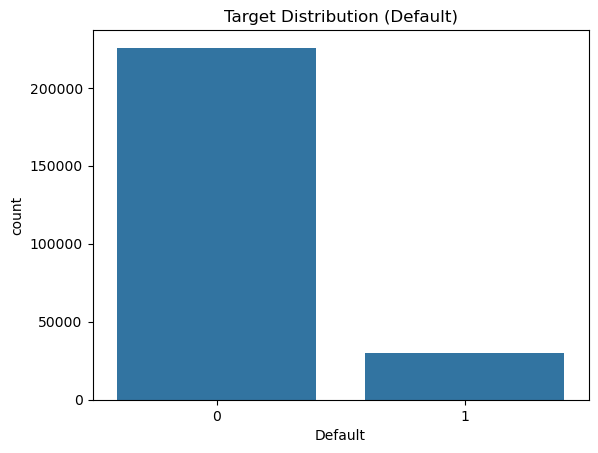

In [6]:
# disctibution of target variable
sns.countplot(x="Default", data=df)
plt.title("Target Distribution (Default)")
plt.show()

* as we can see number of non defaulter is more than defaulter 

In [7]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(["Default"])

In [8]:
df[num_cols].describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


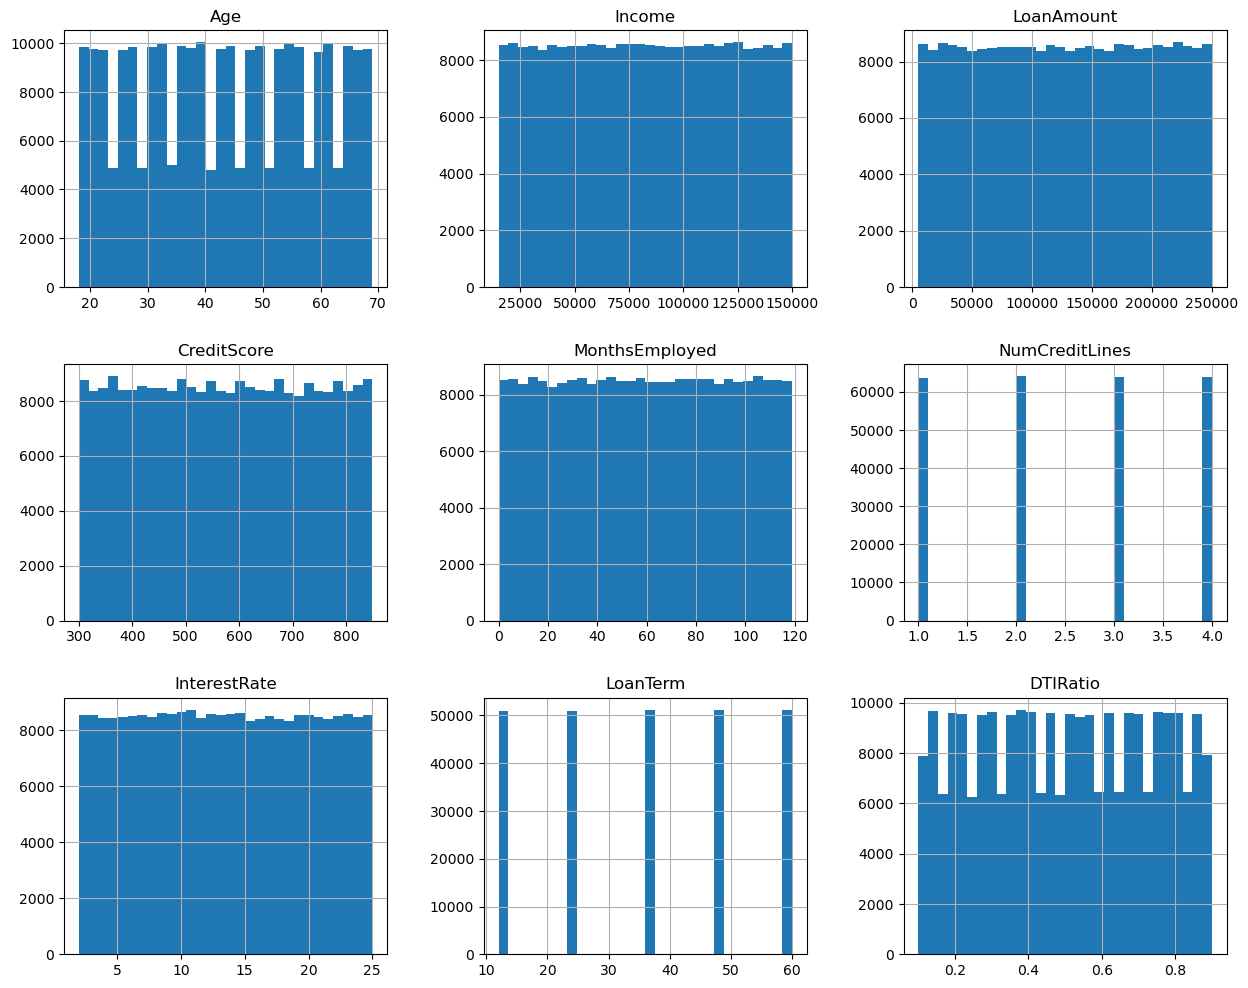

In [9]:
df[num_cols].hist(figsize=(15,12), bins=30)
plt.show()

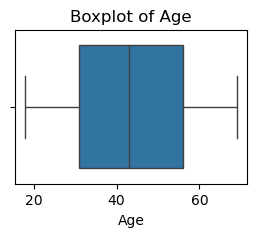

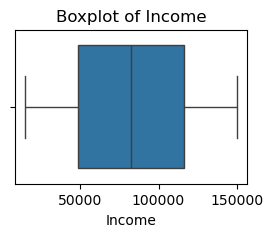

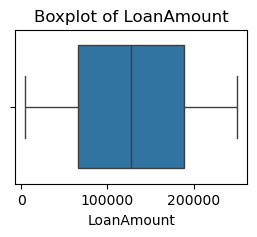

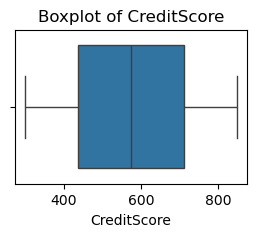

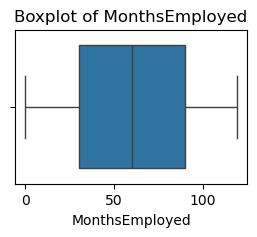

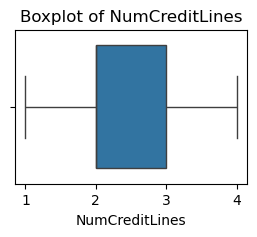

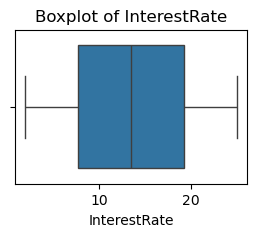

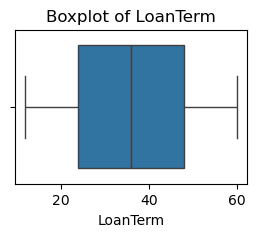

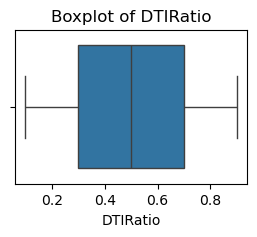

In [10]:
for col in num_cols:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [11]:
df=df.drop('LoanID',axis=1)

In [12]:
cat_cols = df.select_dtypes(include=["object"])

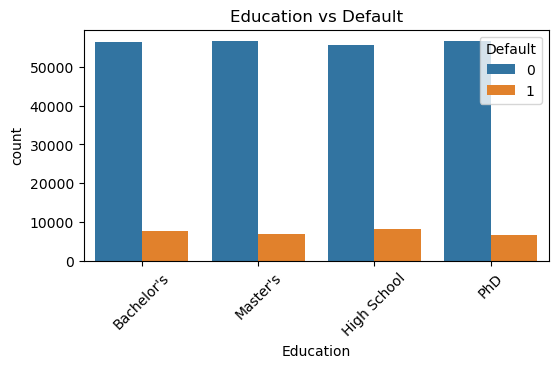

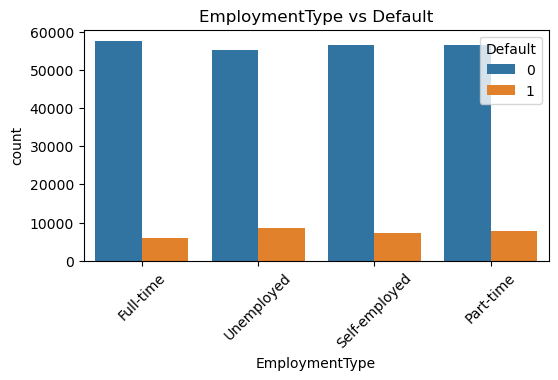

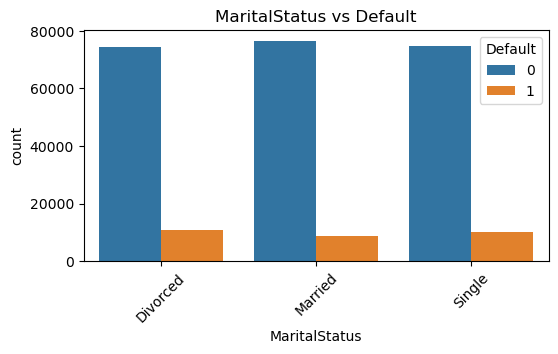

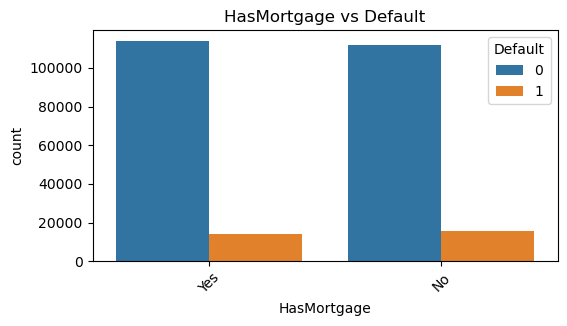

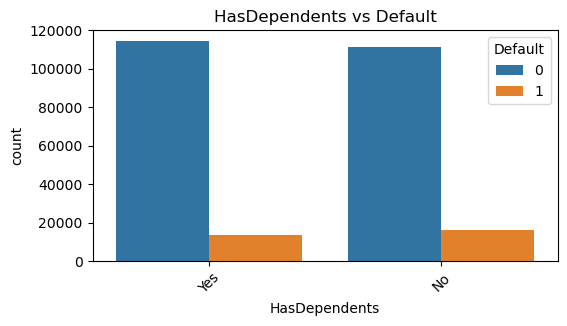

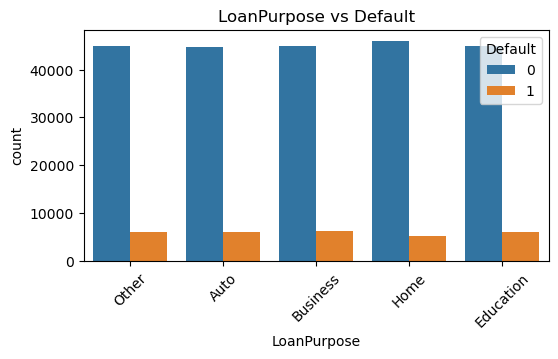

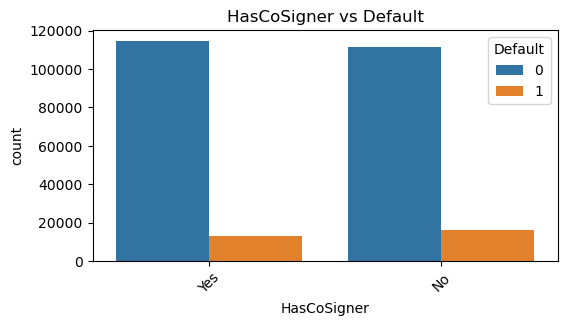

In [13]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue="Default", data=df)
    plt.title(f"{col} vs Default")
    plt.xticks(rotation=45)
    plt.show()

In [14]:
df['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

plt.figure(figsize=(6,4))
sns.scatterplot(x="Income", y="LoanAmount", hue="Default", data=df, alpha=0.5)
plt.title("Loan Amount vs Income")
plt.show()

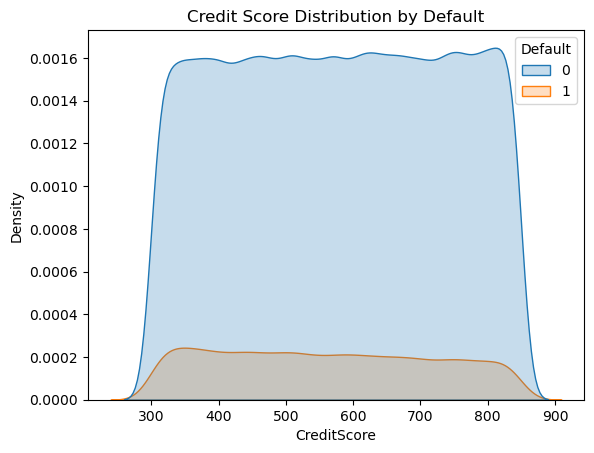

In [15]:
sns.kdeplot(data=df, x="CreditScore", hue="Default", fill=True)
plt.title("Credit Score Distribution by Default")
plt.show()

In [16]:
print(df[num_cols].skew())

Age               0.000698
Income           -0.000381
LoanAmount       -0.001827
CreditScore       0.004688
MonthsEmployed   -0.002142
NumCreditLines   -0.000278
InterestRate      0.004608
LoanTerm         -0.002178
DTIRatio         -0.001499
dtype: float64


#### Data Encoding

In [17]:
binary_cols = ["HasMortgage", "HasDependents", "HasCoSigner"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})


In [18]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [19]:
df.skew()

Age               0.000698
Income           -0.000381
LoanAmount       -0.001827
CreditScore       0.004688
MonthsEmployed   -0.002142
NumCreditLines   -0.000278
InterestRate      0.004608
LoanTerm         -0.002178
DTIRatio         -0.001499
Education         0.007009
EmploymentType    0.001174
MaritalStatus     0.000151
HasMortgage      -0.000055
HasDependents    -0.001073
LoanPurpose      -0.000303
HasCoSigner      -0.000431
Default           2.396377
dtype: float64

#### Data Spliting for training and testing

In [20]:
X = df.drop(['Default'], axis=1)
y = df['Default']


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data imbalance and Scaling 

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [23]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_smote)
X_test_scale = scaler.transform(X_test)

In [24]:
print(y_train.value_counts())
print(y_train_smote.value_counts())

Default
0    180524
1     23753
Name: count, dtype: int64
Default
0    180524
1    180524
Name: count, dtype: int64


## Logistic Regression using smote

In [25]:
lg=LogisticRegression()
lg.fit(X_train_smote,y_train_smote)
y_pred=lg.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.6720187977286078

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78     45170
           1       0.21      0.66      0.32      5900

    accuracy                           0.67     51070
   macro avg       0.57      0.67      0.55     51070
weighted avg       0.85      0.67      0.73     51070

ROC-AUC Score: 0.6662785972390555


In [27]:
score_train=lg.score(X_train_smote,y_train_smote) # score for training 
score_test=lg.score(X_test,y_test) # score for testing data
print(score_train)
print(score_test)

0.6763006580842437
0.6720187977286078


## Logistic reg on Scaled data 

In [28]:
lg=LogisticRegression()
lg.fit(X_train_scale,y_train_smote)
y_pred=lg.predict(X_test_scale)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7426081848443313

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.84     45170
           1       0.22      0.48      0.30      5900

    accuracy                           0.74     51070
   macro avg       0.57      0.63      0.57     51070
weighted avg       0.84      0.74      0.78     51070

ROC-AUC Score: 0.6303703147806966


In [30]:
score_train=lg.score(X_train_scale,y_train_smote) # score for training 
score_test=lg.score(X_test_scale,y_test) # score for testing data
print(score_train)
print(score_test)

0.7816439919345904
0.7426081848443313


## Decision tree

In [31]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_smote,y_train_smote)
y_pred=dtc.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7506755433718426

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85     45170
           1       0.18      0.33      0.23      5900

    accuracy                           0.75     51070
   macro avg       0.54      0.57      0.54     51070
weighted avg       0.82      0.75      0.78     51070

ROC-AUC Score: 0.5658960124276274


In [33]:
score_train=dtc.score(X_train_smote,y_train_smote) # score for training 
score_test=dtc.score(X_test,y_test) # score for testing data
print(score_train)
print(score_test)

1.0
0.7506755433718426


## Guassian naive bayes un scaled

In [34]:
gnb=GaussianNB()
gnb.fit(X_train_smote,y_train_smote)
y_pred=gnb.predict(X_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.662267476013315

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.66      0.78     45170
           1       0.21      0.67      0.31      5900

    accuracy                           0.66     51070
   macro avg       0.57      0.67      0.55     51070
weighted avg       0.85      0.66      0.72     51070

ROC-AUC Score: 0.6653340300109193


In [36]:
score_train=gnb.score(X_train_smote,y_train_smote) # score for training 
score_test=gnb.score(X_test,y_test) # score for testing data
print(score_train)
print(score_test)

0.7381954753938534
0.662267476013315


In [37]:
## Gaussian Naive Bayes with scaled 

In [38]:
gnb=GaussianNB()
gnb.fit(X_train_scale,y_train_smote)
y_pred=gnb.predict(X_test_scale)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7724104170746035

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.87     45170
           1       0.22      0.37      0.27      5900

    accuracy                           0.77     51070
   macro avg       0.56      0.60      0.57     51070
weighted avg       0.83      0.77      0.80     51070

ROC-AUC Score: 0.5977808692585075


# Ensemble tec

In [40]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")  
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

Accuracy: 0.8312903857450558

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     45170
           1       0.25      0.23      0.24      5900

    accuracy                           0.83     51070
   macro avg       0.58      0.57      0.57     51070
weighted avg       0.83      0.83      0.83     51070

ROC-AUC Score: 0.5702831487825654


In [42]:
xgb = XGBClassifier(
    random_state=42)
xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb.predict(X_test)

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))

Accuracy: 0.8609555512042295

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     45170
           1       0.33      0.20      0.25      5900

    accuracy                           0.86     51070
   macro avg       0.62      0.57      0.59     51070
weighted avg       0.83      0.86      0.85     51070

ROC-AUC Score: 0.572686217415939
